<a href="https://colab.research.google.com/github/Sachinkumar-jpg/machine-learning/blob/main/Copy_of_Untitled13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load the CSV file into a pandas DataFrame
file_path = "/content/train.csv"
data = pd.read_csv(file_path)

# Specify the name of the column you want to delete
column_to_delete = "Id"

# Check if the column exists in the DataFrame
if column_to_delete in data.columns:
    # Drop the specified column
    data = data.drop(column_to_delete, axis=1)
    # Save the modified DataFrame back to a CSV file
    #data.to_csv("modified_data.csv", index=False)


In [ ]:


# Identify non-numeric columns (assuming all non-numeric columns need encoding)
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

# Option 1: One-Hot Encoding for Categorical Variables
df_encoded = pd.get_dummies(data, columns=non_numeric_columns)

# Option 2: Label Encoding for Textual Data
# You can use label encoding for ordinal categorical data (e.g., low, medium, high)


label_encoder = LabelEncoder()
for column in non_numeric_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Now, all non-numeric data has been converted to numeric format.

# Save the encoded data to a new CSV file
#df_encoded.to_csv("numeric_data.csv", index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


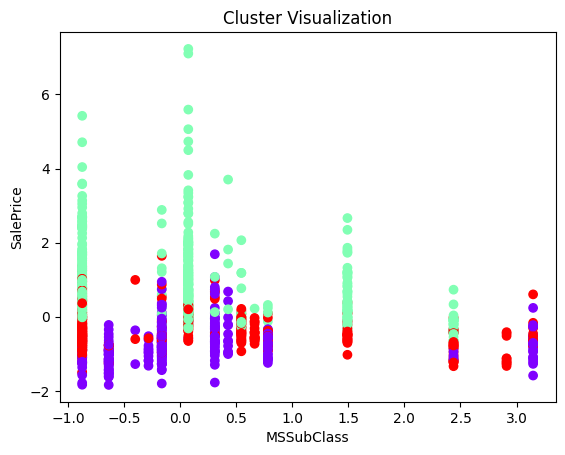

In [ ]:
# Step 1: Handling Missing Values
# You can choose to drop rows with missing values or impute missing values.
# Here, we'll impute missing values with the mean of each column.
df = data.fillna(data.mean())

# Step 2: Scaling Features
# If necessary, scale your features to have zero mean and unit variance.
# This is often important for clustering algorithms.
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  # Scaling the entire DataFrame

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Step 3: Ensure Data Format
# Depending on your dataset, you might need to encode categorical variables or other data format changes.

# If you have categorical variables, you can use one-hot encoding:
# df_encoded = pd.get_dummies(df, columns=["categorical_column"])

# If your data format is suitable, you can skip this step.

# Now, your data is preprocessed, and you can use it for clustering.

# Example: K-Means Clustering


# You can choose the number of clusters (k) based on domain knowledge or use methods like the elbow method.
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

# The 'cluster' column now contains cluster labels assigned by K-Means.
# Step 4: Visualization
plt.scatter(df_scaled['MSSubClass'], df_scaled['SalePrice'], c=df_scaled['cluster'], cmap='rainbow')
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
plt.title('Cluster Visualization')
plt.show()

# Save the preprocessed data to a new CSV file
df_scaled.to_csv("preprocessed_data.csv", index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


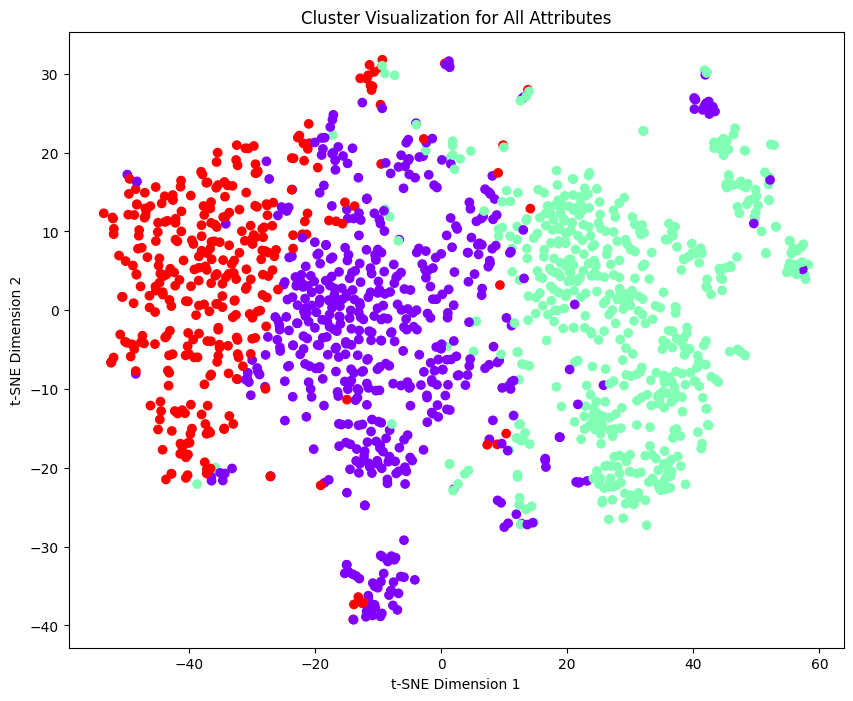

In [ ]:
# Load your dataset into a pandas DataFrame
file_path = "/content/preprocessed_data.csv"
df = pd.read_csv(file_path)

# Specify the target attribute and the attributes you want to visualize
attributes = df.columns
attributes_list = list(attributes)
target_attribute = "SalePrice"  # Replace with the target attribute
attributes_to_visualize = attributes_list  # Add more attributes as needed

# Create a DataFrame with only the target attribute and attributes to visualize
df_selected = df[[target_attribute] + attributes_to_visualize]

# Step 1: Handling Missing Values
df_selected = df_selected.fillna(df_selected.mean())

# Step 2: Scaling Features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Step 3: Clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
df_scaled = pd.DataFrame(df_scaled, columns=df_selected.columns)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled.drop(columns=[target_attribute]))

# Step 4: Dimensionality Reduction (t-SNE)
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
df_tsne = tsne.fit_transform(df_scaled[attributes_to_visualize])

# Step 5: Visualization
plt.figure(figsize=(10, 8))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df_scaled['cluster'], cmap='rainbow')
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("Cluster Visualization for All Attributes")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


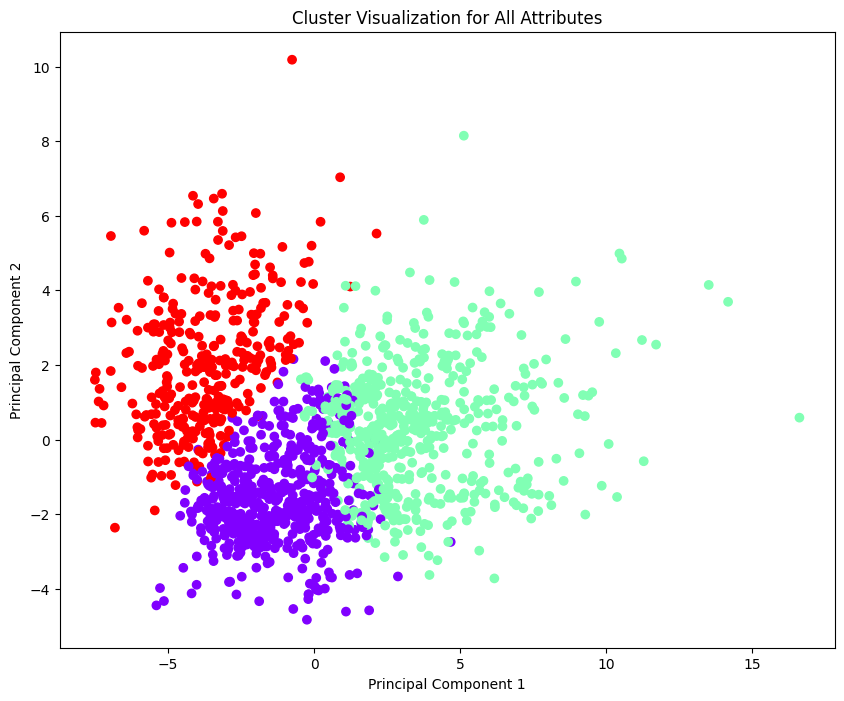

In [ ]:
# Load your dataset into a pandas DataFrame
file_path = "/content/preprocessed_data.csv"
df = pd.read_csv(file_path)

# Specify the target attribute and the attributes you want to visualize
attributes = df.columns
attributes_list = list(attributes)
target_attribute = "SalePrice"  # Replace with the target attribute
attributes_to_visualize = attributes_list  # Add more attributes as needed

# Create a DataFrame with only the target attribute and attributes to visualize
df_selected = df[[target_attribute] + attributes_to_visualize]

# Step 1: Handling Missing Values
df_selected = df_selected.fillna(df_selected.mean())

# Step 2: Scaling Features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Step 3: Clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
df_scaled = pd.DataFrame(df_scaled, columns=df_selected.columns)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled.drop(columns=[target_attribute]))

# Step 4: Visualization
# Use PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled[attributes_to_visualize])

# Create a scatter plot for cluster visualization
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_scaled['cluster'], cmap='rainbow')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Cluster Visualization for All Attributes")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


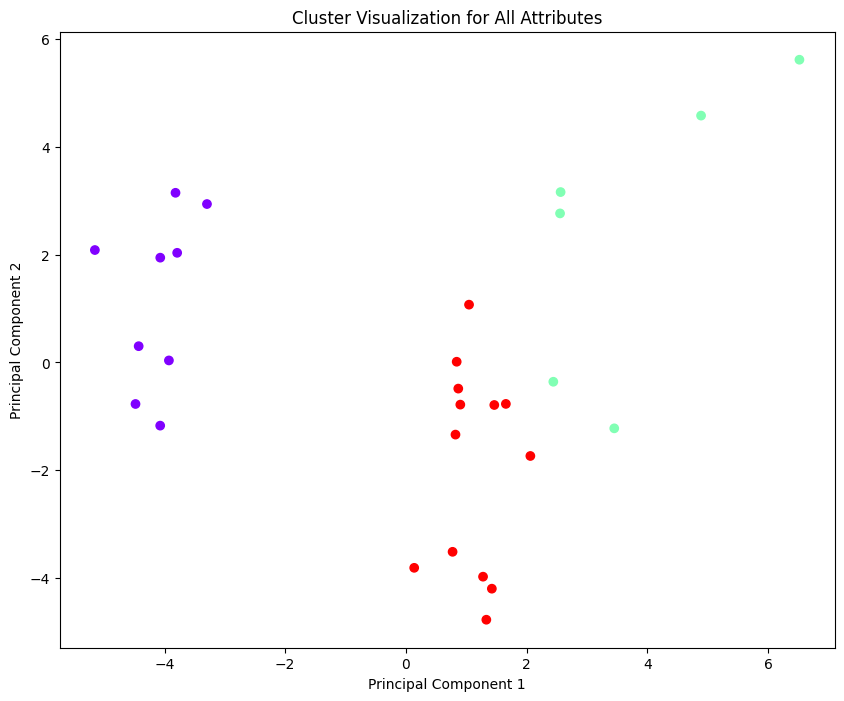

In [ ]:
# Load your dataset into a pandas DataFrame
file_path = "/content/preprocessed_data.csv"
df = pd.read_csv(file_path)

def remove_outliers_iqr(data, attribute):
    Q1 = data[attribute].quantile(0.25)
    Q3 = data[attribute].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned = data[(data[attribute] >= lower_bound) & (data[attribute] <= upper_bound)]
    return data_cleaned

# Iterate through each attribute and remove outliers
for column in df.columns:
    if df[column].dtype != 'object':  # Check if the column is numeric
        df = remove_outliers_iqr(df, column)

# Save the cleaned data to a new CSV file
#df.to_csv("data_without_outliers.csv", index=False)
# Specify the target attribute and the attributes you want to visualize
attributes = df.columns
attributes_list = list(attributes)
target_attribute = "SalePrice"  # Replace with the target attribute
attributes_to_visualize = attributes_list  # Add more attributes as needed

# Create a DataFrame with only the target attribute and attributes to visualize
df_selected = df[[target_attribute] + attributes_to_visualize]

# Step 1: Handling Missing Values
df_selected = df_selected.fillna(df_selected.mean())

# Step 2: Scaling Features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Step 3: Clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
df_scaled = pd.DataFrame(df_scaled, columns=df_selected.columns)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled.drop(columns=[target_attribute]))

# Step 4: Visualization
# Use PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled[attributes_to_visualize])

# Create a scatter plot for cluster visualization
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_scaled['cluster'], cmap='rainbow')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Cluster Visualization for All Attributes")
plt.show()

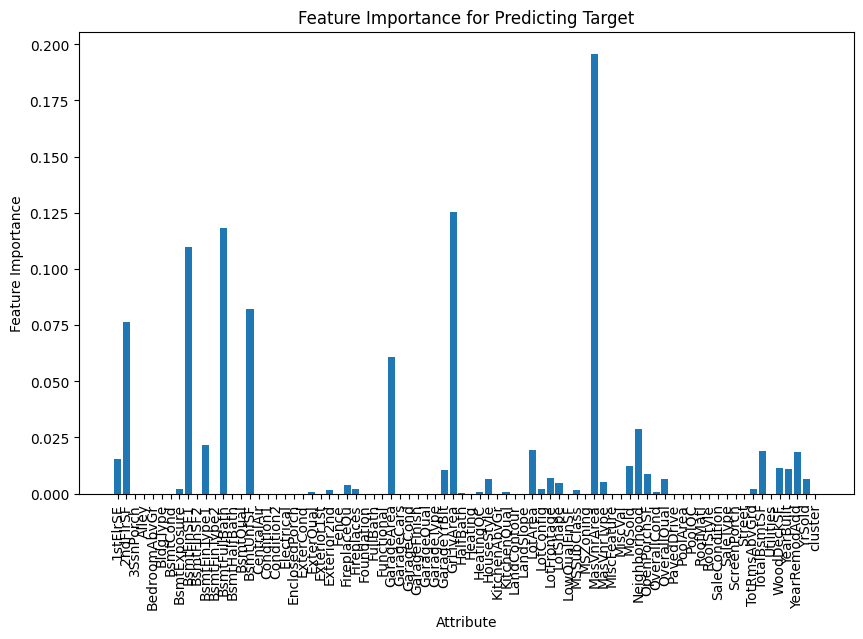

In [ ]:
target_attribute = "SalePrice"  # Replace with the name of your target attribute
attributes_to_use = df.columns.difference([target_attribute])  # Use all columns except the target

# Separate the data into features (X) and the target (y)
X = df[attributes_to_use]
y = df[target_attribute]

# Determine the type of the target attribute (classification or regression)
is_classification = len(y.unique()) <= 10  # You can adjust the threshold as needed

# Create a Random Forest model and fit it to the data
if is_classification:
    model = RandomForestClassifier(n_estimators=100, random_state=0)
else:
    model = RandomForestRegressor(n_estimators=100, random_state=0)

model.fit(X, y)

# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a bar chart to visualize the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(attributes_to_use)), feature_importances)
plt.xticks(range(len(attributes_to_use)), attributes_to_use, rotation=90)
plt.xlabel("Attribute")
plt.ylabel("Feature Importance")
plt.title("Feature Importance for Predicting Target")
plt.show()

In [ ]:
target_attribute = "SalePrice"  # Replace with the name of your target attribute
attributes_to_use = df.columns.difference([target_attribute])  # Use all columns except the target

X = df[attributes_to_use]
y = df[target_attribute]

# Determine the type of the target attribute (classification or regression)
is_classification = len(y.unique()) <= 10  # You can adjust the threshold as needed

# Create a Random Forest model and fit it to the data
if is_classification:
    model = RandomForestClassifier(n_estimators=100, random_state=0)
else:
    model = RandomForestRegressor(n_estimators=100, random_state=0)

model.fit(X, y)

# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a list of relevant attributes (those with non-zero importance)
relevant_attributes = [attr for attr, importance in zip(attributes_to_use, feature_importances) if importance > 0]

# Create a new DataFrame with only the relevant attributes
df_filtered = df[relevant_attributes]
df_filtered["SalePrice"] = df["SalePrice"]

# Save the filtered data to a new CSV file
#df_filtered.to_csv("data_filtered.csv", index=False)

<ipython-input-63-4e81a42111d9>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["SalePrice"] = df["SalePrice"]


In [ ]:
attributes = df_filtered.columns

# Convert the attributes to a Python list
attributes_list = list(attributes)
print(attributes_list)

df_filtered.to_csv("data_filtered.csv", index=False)

['1stFlrSF', '2ndFlrSF', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtFullBath', 'BsmtUnfSF', 'ExterQual', 'Exterior2nd', 'FireplaceQu', 'Fireplaces', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'MSSubClass', 'MasVnrArea', 'MasVnrType', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'SalePrice']


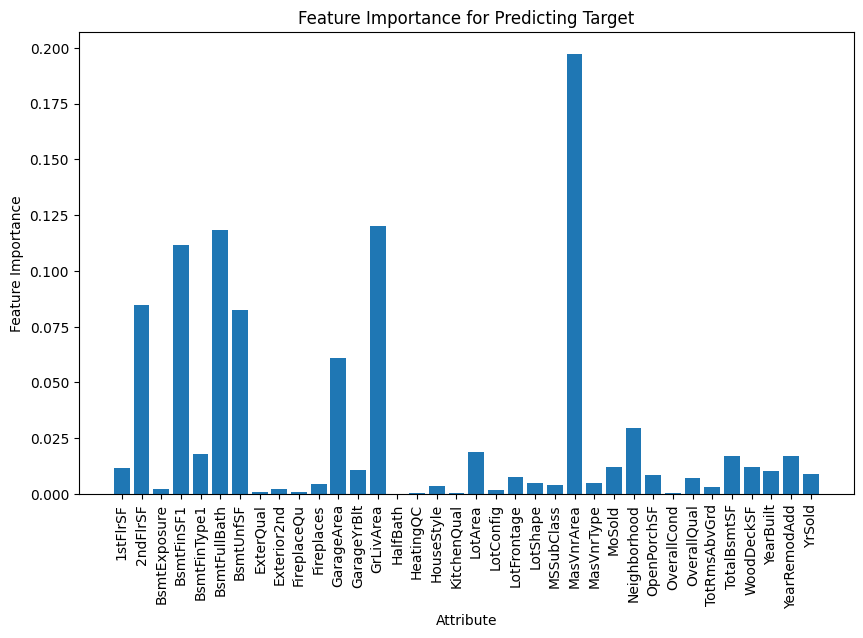

In [ ]:
target_attribute = "SalePrice"  # Replace with the name of your target attribute
attributes_to_use = df_filtered.columns.difference([target_attribute])  # Use all columns except the target

# Separate the data into features (X) and the target (y)
X = df_filtered[attributes_to_use]
y = df_filtered[target_attribute]

# Determine the type of the target attribute (classification or regression)
is_classification = len(y.unique()) <= 10  # You can adjust the threshold as needed

# Create a Random Forest model and fit it to the data
if is_classification:
    model = RandomForestClassifier(n_estimators=100, random_state=0)
else:
    model = RandomForestRegressor(n_estimators=100, random_state=0)

model.fit(X, y)

# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a bar chart to visualize the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(attributes_to_use)), feature_importances)
plt.xticks(range(len(attributes_to_use)), attributes_to_use, rotation=90)
plt.xlabel("Attribute")
plt.ylabel("Feature Importance")
plt.title("Feature Importance for Predicting Target")
plt.show()

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('/content/data_filtered.csv')

X = data.drop(columns=['SalePrice'])  # Replace 'target_column' with the actual target column name
y = data['SalePrice']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_valid)

# Calculate and print the model's performance metrics
mse = mean_squared_error(y_valid, y_pred)
#mae = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
#print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error: 0.04
R-squared (R2): 0.44


In [77]:
# Random Forest Regression
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
rf_y_pred = random_forest_model.predict(X_valid)

# Gradient Boosting Regression
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_model.fit(X_train, y_train)
gb_y_pred = gradient_boosting_model.predict(X_valid)

# Evaluate Random Forest Regression
rf_mse = mean_squared_error(y_valid, rf_y_pred)
#rf_mae = np.sqrt(rf_mse)
rf_r2 = r2_score(y_valid, rf_y_pred)

# Evaluate Gradient Boosting Regression
gb_mse = mean_squared_error(y_valid, gb_y_pred)
#gb_mae = np.sqrt(gb_mse)
gb_r2 = r2_score(y_valid, gb_y_pred)

print("Random Forest Regression:")
print(f"Mean Squared Error: {rf_mse:.2f}")
#print(f"Mean Absolute Error: {rf_mae:.2f}")
print(f"R-squared (R2): {rf_r2:.2f}")

print("\nGradient Boosting Regression:")
print(f"Mean Squared Error: {gb_mse:.2f}")
#print(f"Mean Absolute Error: {gb_mae:.2f}")
print(f"R-squared (R2): {gb_r2:.2f}")

Random Forest Regression:
Mean Squared Error: 0.05
R-squared (R2): 0.36

Gradient Boosting Regression:
Mean Squared Error: 0.05
R-squared (R2): 0.31
